In [ ]:
!pip install yfinance ta gspread oauth2client schedule

import yfinance as yf
import pandas as pd
import numpy as np
import ta
import logging
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import requests
import time
import schedule


In [ ]:
TICKERS = [
    'RELIANCE.NS', 'TCS.NS', 'INFY.NS',
    'HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS',
    'SBIN.NS', 'HINDUNILVR.NS', 'ITC.NS',
    'LT.NS', 'AXISBANK.NS', 'WIPRO.NS',
    'TECHM.NS', 'BHARTIARTL.NS', 'MARUTI.NS'
]

def fetch_data(ticker):
    try:
        df = yf.Ticker(ticker).history(period="6mo", interval="1d", auto_adjust=True)
        if df.empty:
            print(f"No data for {ticker}")
            return pd.DataFrame()
        df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
        df['Ticker'] = ticker
        df['Date'] = df.index
        return df
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return pd.DataFrame()



In [ ]:
def add_indicators(df):
    df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()
    df['MACD'] = ta.trend.MACD(df['Close']).macd()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    return df


In [ ]:
all_data = []
for ticker in TICKERS:
    df_t = fetch_data(ticker)
    if not df_t.empty:
        df_t = add_indicators(df_t)
        all_data.append(df_t)

df = pd.concat(all_data)
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)


In [ ]:
print(" Final shape:", df.shape)
print(df[['Date', 'Ticker', 'Close', 'RSI', 'MACD', 'MA20', 'MA50']].head())


 Final shape: (1125, 11)
                        Date       Ticker        Close        RSI       MACD  \
49 2025-03-05 00:00:00+05:30  RELIANCE.NS  1175.599976  33.932527 -18.444276   
50 2025-03-06 00:00:00+05:30  RELIANCE.NS  1209.599976  47.072021 -16.346240   
51 2025-03-07 00:00:00+05:30  RELIANCE.NS  1249.800049  57.766912 -11.309355   
52 2025-03-10 00:00:00+05:30  RELIANCE.NS  1238.400024  54.409320  -8.143600   
53 2025-03-11 00:00:00+05:30  RELIANCE.NS  1247.300049  56.533417  -4.860529   

           MA20         MA50  
49  1221.912500  1238.321997  
50  1218.482501  1238.182996  
51  1216.895001  1238.757996  
52  1215.480005  1239.311997  
53  1215.162506  1239.948999  


In [ ]:
def generate_signals(df):
    df['Buy_Signal'] = (df['RSI'] < 40) & (df['MA20'] > df['MA50'])
    return df

df = generate_signals(df)
print(df[df['Buy_Signal'] == True][['Date', 'Ticker', 'Close', 'RSI', 'MA20', 'MA50']])


                          Date         Ticker         Close        RSI  \
69   2025-04-04 00:00:00+05:30    RELIANCE.NS   1204.699951  37.890129   
70   2025-04-07 00:00:00+05:30    RELIANCE.NS   1165.699951  31.019270   
71   2025-04-08 00:00:00+05:30    RELIANCE.NS   1182.199951  36.283568   
72   2025-04-09 00:00:00+05:30    RELIANCE.NS   1185.349976  37.267845   
986  2025-06-18 00:00:00+05:30  HINDUNILVR.NS   2273.392578  38.654111   
987  2025-06-19 00:00:00+05:30  HINDUNILVR.NS   2270.324707  38.147272   
1186 2025-04-07 00:00:00+05:30          LT.NS   3040.146484  31.128487   
1187 2025-04-08 00:00:00+05:30          LT.NS   3131.891113  39.246558   
1188 2025-04-09 00:00:00+05:30          LT.NS   3025.929199  34.228306   
1189 2025-04-11 00:00:00+05:30          LT.NS   3087.158203  39.075961   
1413 2025-03-05 00:00:00+05:30       WIPRO.NS    285.100006  39.133999   
1414 2025-03-06 00:00:00+05:30       WIPRO.NS    285.899994  39.877717   
1415 2025-03-07 00:00:00+05:30       W

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your creds JSON


Saving algo-trading-463914-7e4c5cad2b30.json to algo-trading-463914-7e4c5cad2b30 (1).json


In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json", scope)
client = gspread.authorize(creds)

# Open your Google Sheet
sheet = client.open("Algo-Trading").sheet1


In [ ]:
for _, row in buy_signals.iterrows():
    try:
        sheet.append_row([
            str(row['Date']),
            row['Ticker'],
            round(row['Close'], 2),
            round(row['RSI'], 2),
            round(row['MA20'], 2),
            round(row['MA50'], 2),
            'BUY'
        ])
    except Exception as e:
        print(f"Error logging to sheet: {e}")


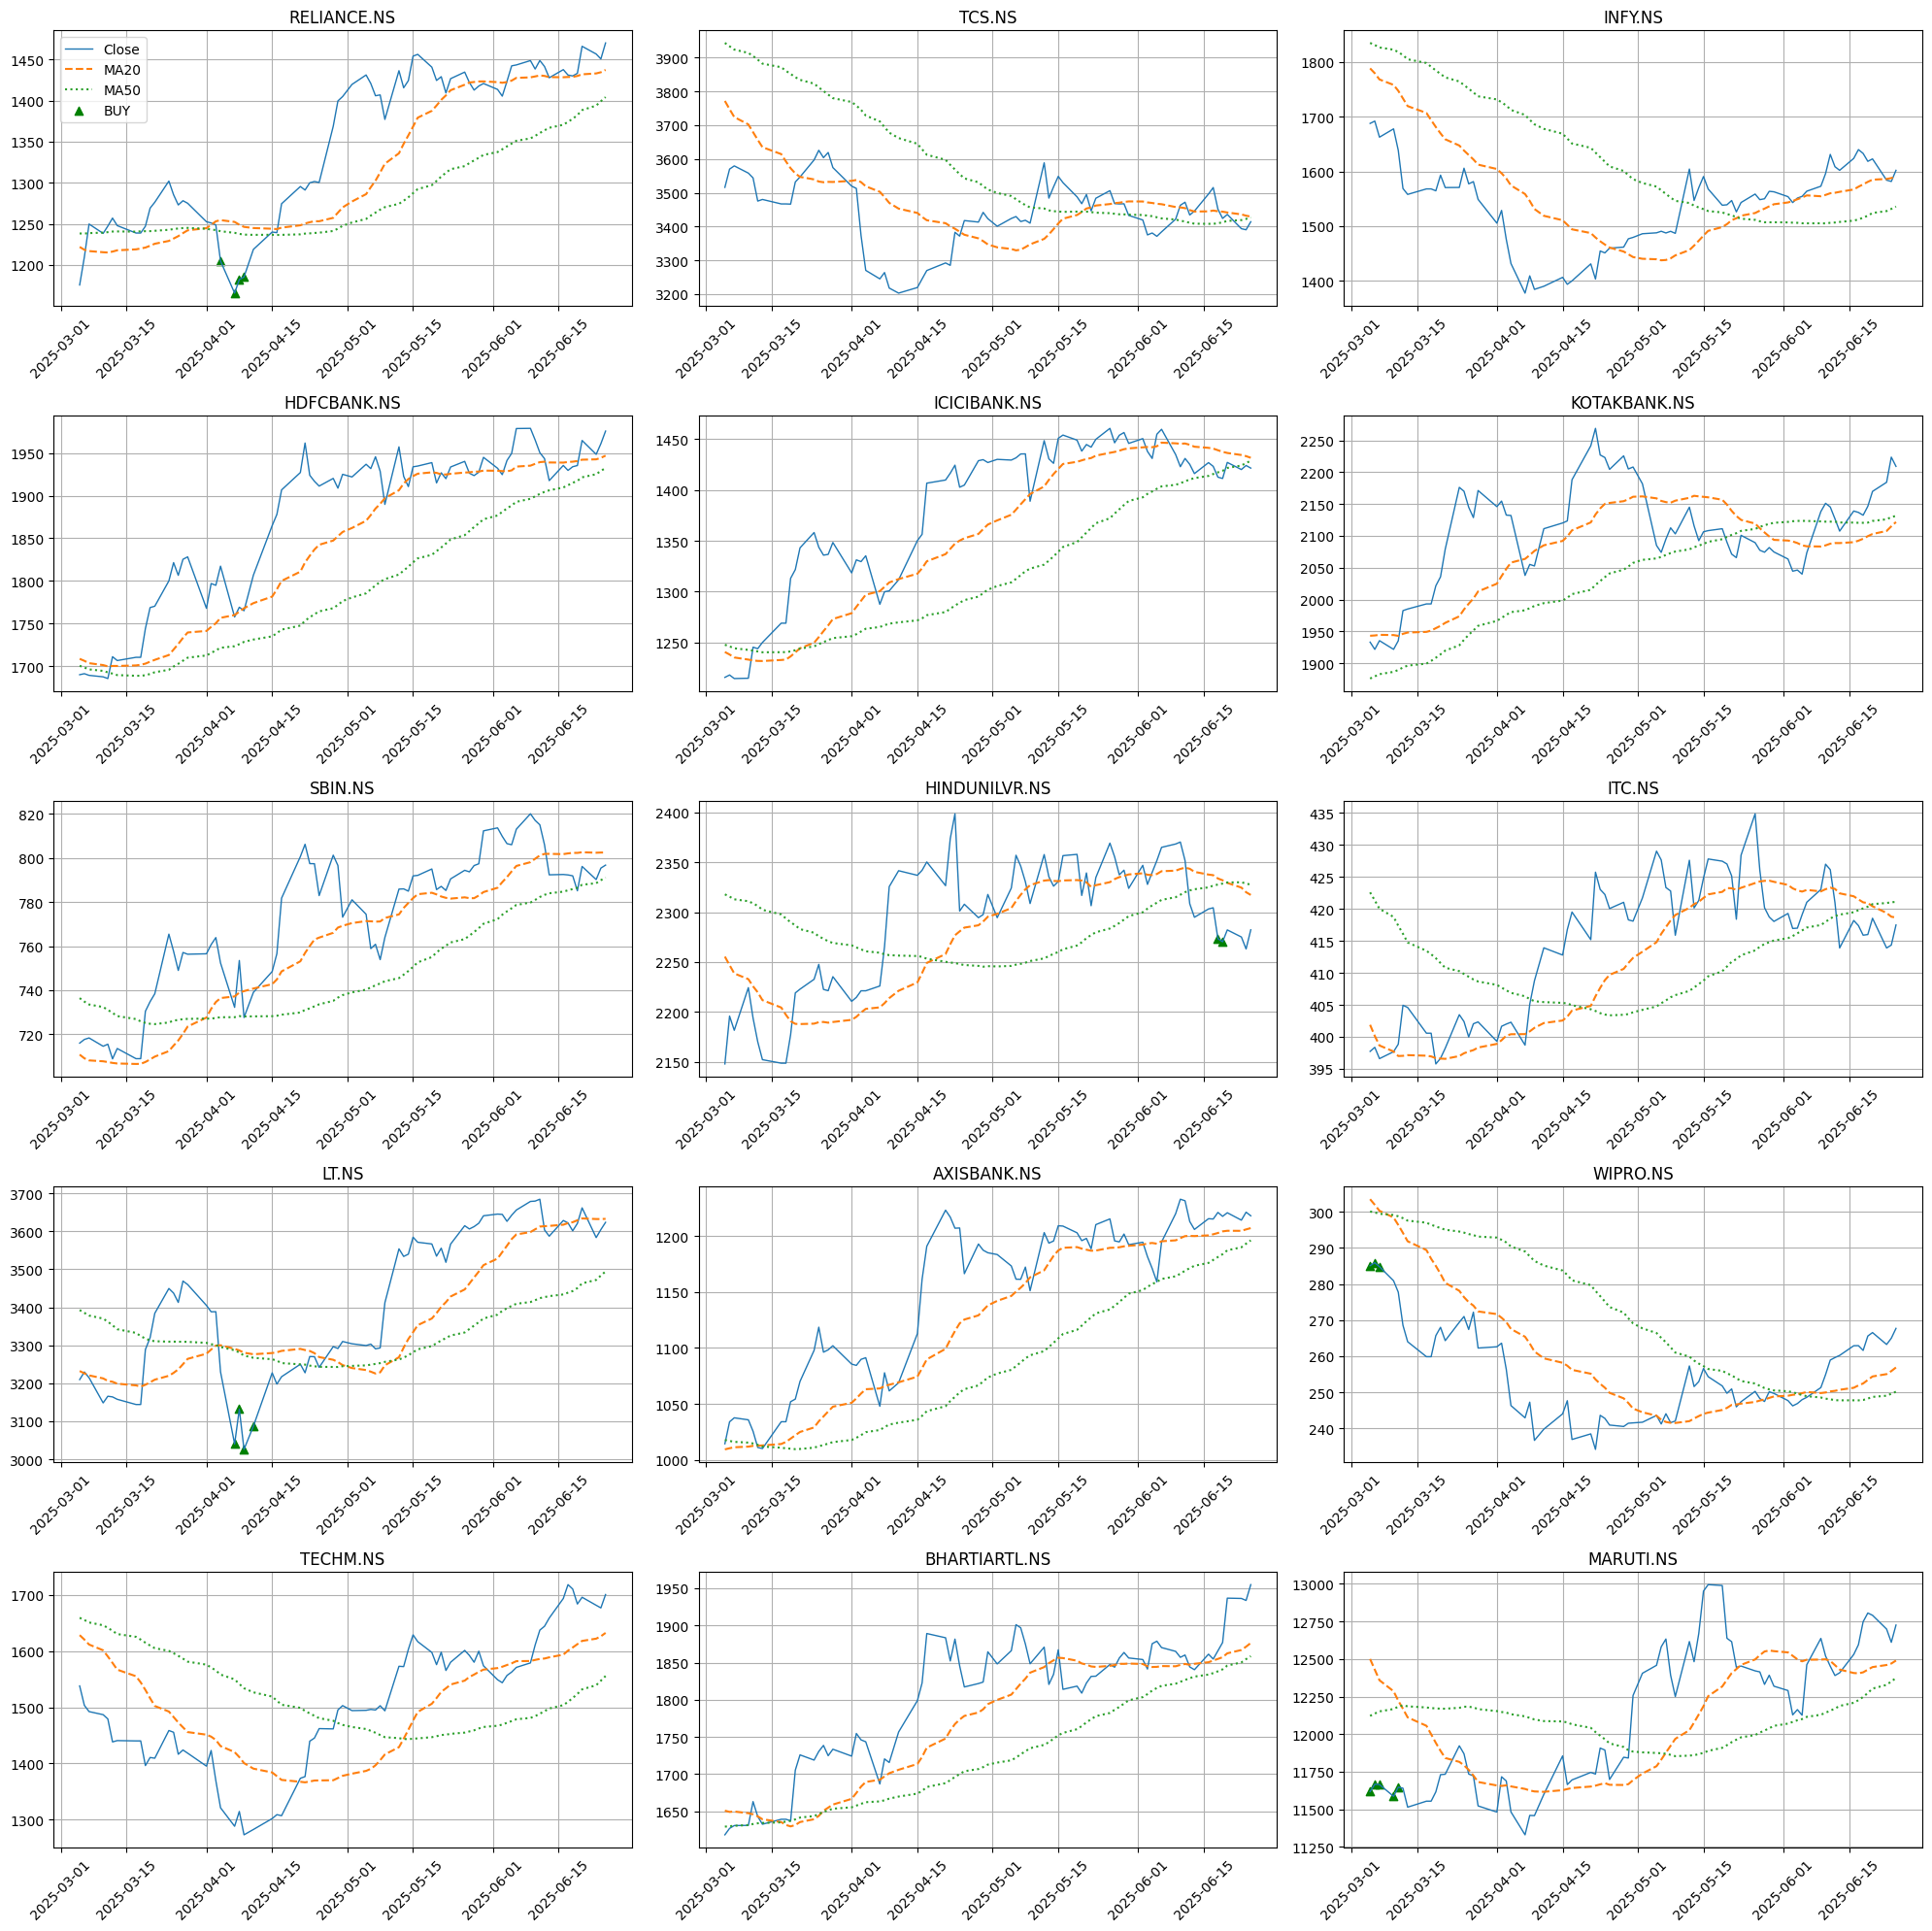

In [ ]:
import matplotlib.pyplot as plt

tickers = [
    'RELIANCE.NS', 'TCS.NS', 'INFY.NS',
    'HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS',
    'SBIN.NS', 'HINDUNILVR.NS', 'ITC.NS',
    'LT.NS', 'AXISBANK.NS', 'WIPRO.NS',
    'TECHM.NS', 'BHARTIARTL.NS', 'MARUTI.NS'
]

# Setup subplot grid (5 rows x 3 columns)
rows = 5
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
axs = axs.flatten()  # flatten 2D array to 1D

for i, ticker in enumerate(tickers):
    ax = axs[i]
    df_plot = df[df['Ticker'] == ticker]

    ax.plot(df_plot['Date'], df_plot['Close'], label='Close', linewidth=1)
    ax.plot(df_plot['Date'], df_plot['MA20'], label='MA20', linestyle='--')
    ax.plot(df_plot['Date'], df_plot['MA50'], label='MA50', linestyle=':')
    ax.scatter(df_plot[df_plot['Buy_Signal']]['Date'],
               df_plot[df_plot['Buy_Signal']]['Close'],
               color='green', marker='^', label='BUY')

    ax.set_title(ticker)
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes (in case we don’t fill all 15 slots exactly)
for j in range(len(tickers), len(axs)):
    fig.delaxes(axs[j])

# Add legend to only one subplot to reduce clutter
axs[0].legend(loc='upper left')

plt.tight_layout()
plt.show()


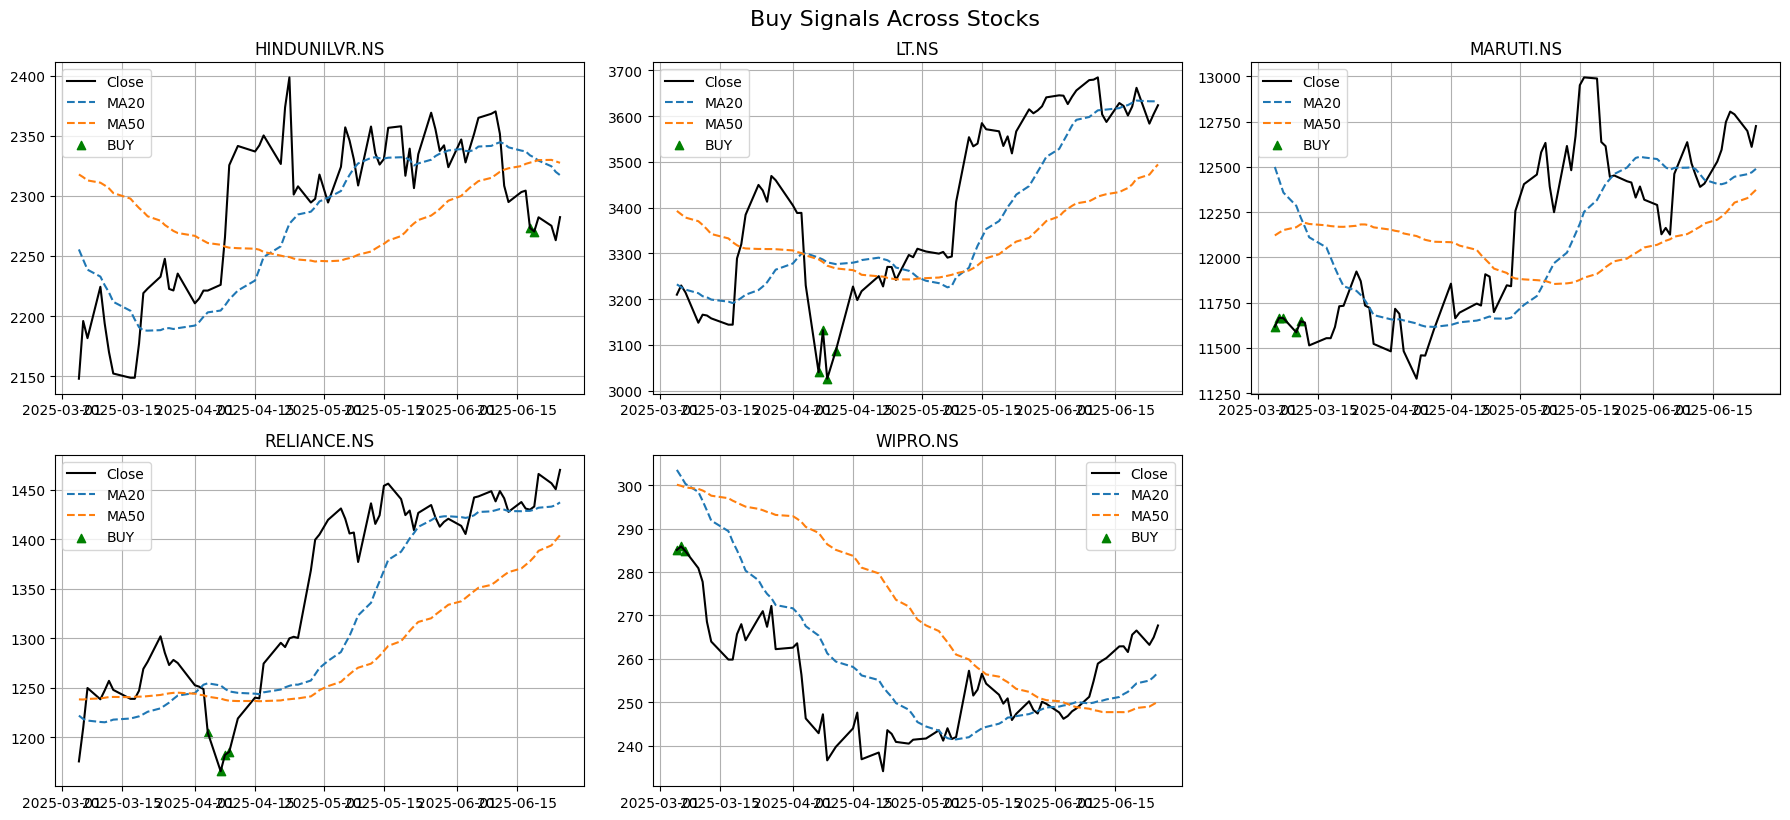

In [ ]:
import matplotlib.pyplot as plt

# Filter tickers with buy signals
tickers_with_signals = df[df['Buy_Signal'] == True]['Ticker'].unique()

# Set up grid layout
num_stocks = len(tickers_with_signals)
cols = 3
rows = (num_stocks + cols - 1) // cols  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows), sharex=False)
axes = axes.flatten()

for i, stock in enumerate(tickers_with_signals):
    df_plot = df[df['Ticker'] == stock]

    axes[i].plot(df_plot['Date'], df_plot['Close'], label='Close', color='black')
    axes[i].plot(df_plot['Date'], df_plot['MA20'], label='MA20', linestyle='--')
    axes[i].plot(df_plot['Date'], df_plot['MA50'], label='MA50', linestyle='--')
    axes[i].scatter(
        df_plot[df_plot['Buy_Signal']]['Date'],
        df_plot[df_plot['Buy_Signal']]['Close'],
        color='green', marker='^', label='BUY'
    )
    axes[i].set_title(f"{stock}")
    axes[i].legend()
    axes[i].grid(True)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Buy Signals Across Stocks", fontsize=16, y=1.02)
plt.show()


In [ ]:
buy_signals = df[df['Buy_Signal'] == True]
print("Buy signals found:", len(buy_signals))
print(buy_signals[['Date', 'Ticker', 'Close']].tail())


Buy signals found: 18
                          Date     Ticker         Close
1785 2025-03-05 00:00:00+05:30  MARUTI.NS  11617.349609
1786 2025-03-06 00:00:00+05:30  MARUTI.NS  11666.400391
1787 2025-03-07 00:00:00+05:30  MARUTI.NS  11664.150391
1788 2025-03-10 00:00:00+05:30  MARUTI.NS  11586.049805
1789 2025-03-11 00:00:00+05:30  MARUTI.NS  11646.950195


In [ ]:
profits = []

for _, row in buy_signals.iterrows():
    date = row['Date']
    ticker = row['Ticker']
    entry_price = row['Close']

    # Ensure next day's data exists
    df_future = df[(df['Ticker'] == ticker) & (df['Date'] > date)].sort_values('Date')

    if not df_future.empty:
        exit_price = df_future.iloc[0]['Close']
        profit = exit_price - entry_price
        profits.append(profit)

# Evaluation
total_trades = len(profits)
wins = sum(p > 0 for p in profits)
total_pnl = sum(profits)
win_ratio = wins / total_trades if total_trades > 0 else 0

print(f"Total Trades: {total_trades}")
print(f"Win Ratio: {win_ratio:.2f}")
print(f"Total P&L: ₹{total_pnl:.2f}")


Total Trades: 18
Win Ratio: 0.56
Total P&L: ₹228.96


In [ ]:
df.sort_values(by=['Ticker', 'Date'], inplace=True)
df['Target'] = df.groupby('Ticker')['Close'].shift(-1) > df['Close']
df['Target'] = df['Target'].astype(int)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

tickers = [
    'RELIANCE.NS', 'TCS.NS', 'INFY.NS',
    'HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS',
    'SBIN.NS', 'HINDUNILVR.NS', 'ITC.NS',
    'LT.NS', 'AXISBANK.NS', 'WIPRO.NS',
    'TECHM.NS', 'BHARTIARTL.NS', 'MARUTI.NS'
]

features = ['RSI', 'MACD', 'MA20', 'MA50', 'Volume']
dt_accuracies = []
lr_accuracies = []

for ticker in tickers:
    df_ml = df[df['Ticker'] == ticker].copy()

    # Check required columns
    if not all(col in df_ml.columns for col in features + ['Target']):
        print(f"\n Columns missing for {ticker}")
        continue

    # Drop rows with NaNs
    df_ml.dropna(subset=features + ['Target'], inplace=True)

    if df_ml.shape[0] < 30:
        print(f"\n Not enough data for {ticker} after cleaning.")
        continue

    X = df_ml[features]
    y = df_ml['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    if X_train.empty or X_test.empty:
        print(f"\n Skipping {ticker} due to empty train/test set.")
        continue

    # Model 1: Decision Tree
    dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    dt_acc = accuracy_score(y_test, dt_pred)
    dt_accuracies.append(dt_acc)

    # Model 2: Logistic Regression
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_acc = accuracy_score(y_test, lr_pred)
    lr_accuracies.append(lr_acc)

    # Output comparison
    print(f"\n  Results for {ticker}")
    print(f" Decision Tree Accuracy: {dt_acc:.2f}")
    print(f" Logistic Regression Accuracy: {lr_acc:.2f}")

# Overall Accuracy
if dt_accuracies:
    print(f"\n Avg Decision Tree Accuracy: {sum(dt_accuracies)/len(dt_accuracies):.2f}")
if lr_accuracies:
    print(f" Avg Logistic Regression Accuracy: {sum(lr_accuracies)/len(lr_accuracies):.2f}")



  Results for RELIANCE.NS
 Decision Tree Accuracy: 0.53
 Logistic Regression Accuracy: 0.60

  Results for TCS.NS
 Decision Tree Accuracy: 0.53
 Logistic Regression Accuracy: 0.47

  Results for INFY.NS
 Decision Tree Accuracy: 0.53
 Logistic Regression Accuracy: 0.47

  Results for HDFCBANK.NS
 Decision Tree Accuracy: 0.47
 Logistic Regression Accuracy: 0.53

  Results for ICICIBANK.NS
 Decision Tree Accuracy: 0.33
 Logistic Regression Accuracy: 0.33

  Results for KOTAKBANK.NS
 Decision Tree Accuracy: 0.47
 Logistic Regression Accuracy: 0.47

  Results for SBIN.NS
 Decision Tree Accuracy: 0.33
 Logistic Regression Accuracy: 0.53

  Results for HINDUNILVR.NS
 Decision Tree Accuracy: 0.40
 Logistic Regression Accuracy: 0.40

  Results for ITC.NS
 Decision Tree Accuracy: 0.53
 Logistic Regression Accuracy: 0.67

  Results for LT.NS
 Decision Tree Accuracy: 0.53
 Logistic Regression Accuracy: 0.60

  Results for AXISBANK.NS
 Decision Tree Accuracy: 0.60
 Logistic Regression Accuracy: 0.

In [ ]:
prediction = model.predict(X.iloc[[-1]])[0]
try:
    sheet2 = client.open("Algo-Trading").worksheet("Summary")
except:
    sheet2 = client.open("Algo-Trading").add_worksheet("Summary", rows="100", cols="5")

sheet2.append_row([
    'ML Prediction',
    ticker,
    str(df_ml.iloc[-1]['Date']),
    'UP' if prediction == 1 else 'DOWN',
    f'Accuracy: {accuracy_score(y_test, y_pred):.2f}'
])


{'spreadsheetId': '1zySXtzPthUOP7koC0ZRgCuE1T845KxLoVgjKg6MCE5M',
 'tableRange': 'Summary!A1:E4',
 'updates': {'spreadsheetId': '1zySXtzPthUOP7koC0ZRgCuE1T845KxLoVgjKg6MCE5M',
  'updatedRange': 'Summary!A5:E5',
  'updatedRows': 1,
  'updatedColumns': 5,
  'updatedCells': 5}}

In [ ]:
import requests

# Store token securely (recommended: use environment variable or .env file in production)
TELEGRAM_BOT_TOKEN = '7556667994:AAHcp31FxtTHuU1Jw3jFFOKWxjSeHnFdm44'  # 🔒 REPLACE with your real token but NEVER expose it publicly
TELEGRAM_CHAT_ID = '6014490670'  # Replace with your actual Telegram chat ID

def send_telegram_alert(message):
    """Sends a formatted message to your Telegram bot."""
    url = f"https://api.telegram.org/bot{TELEGRAM_BOT_TOKEN}/sendMessage"
    payload = {
        "chat_id": TELEGRAM_CHAT_ID,
        "text": message,
        "parse_mode": "HTML"
    }
    try:
        response = requests.post(url, data=payload)
        if response.status_code == 200:
            print(" Telegram alert sent successfully!")
        else:
            print(" Failed to send Telegram alert:", response.text)
    except Exception as e:
        print(" Telegram Error:", str(e))


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving .env to .env


In [ ]:
import os
print(os.listdir())


['.config', 'algo-trading-463914-7e4c5cad2b30.json', 'algo-trading-463914-7e4c5cad2b30 (1).json', 'creds.json', '.ipynb_checkpoints', '.env', 'sample_data']


In [ ]:
!pip install python-dotenv


In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()  # This loads from `.env` in current directory

# Read the values
TELEGRAM_BOT_TOKEN = os.getenv("TELEGRAM_BOT_TOKEN")
TELEGRAM_CHAT_ID = os.getenv("TELEGRAM_CHAT_ID")

print("Token loaded:", bool(TELEGRAM_BOT_TOKEN))
print("Chat ID loaded:", TELEGRAM_CHAT_ID)


Token loaded: True
Chat ID loaded: 6014490670


In [ ]:
# Loop through each BUY signal row and log + alert
for _, row in buy_signals.iterrows():
    try:
        # Extract values safely
        date = str(row['Date'])
        ticker = row['Ticker']
        close = round(float(row['Close']), 2)
        rsi = round(float(row['RSI']), 2)
        ma20 = round(float(row['MA20']), 2)
        ma50 = round(float(row['MA50']), 2)

        # Append to Google Sheet
        sheet.append_row([date, ticker, close, rsi, ma20, ma50, 'BUY'])

        # Send Telegram alert
        alert_msg = f"""
<b> BUY Signal Alert</b>
Stock: <b>{ticker}</b>
Price: ₹{close}
RSI: {rsi}
MA20: {ma20} | MA50: {ma50}
Date: {date}
"""
        send_telegram_alert(alert_msg)

    except Exception as e:
        print(f" Failed to log/send alert for {row['Ticker']}: {e}")


✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!


In [ ]:
# For each BUY signal row, log to specific worksheet and send Telegram alert
for _, row in buy_signals.iterrows():
    try:
        # Extract values
        date = str(row['Date'])
        ticker = row['Ticker']
        close = round(float(row['Close']), 2)
        rsi = round(float(row['RSI']), 2)
        ma20 = round(float(row['MA20']), 2)
        ma50 = round(float(row['MA50']), 2)

        #  Get or create worksheet for this ticker
        try:
            ws = client.open(GOOGLE_SHEET_NAME).worksheet(ticker)
        except:
            ws = client.open(GOOGLE_SHEET_NAME).add_worksheet(title=ticker, rows="100", cols="7")
            ws.append_row(["Date", "Ticker", "Close", "RSI", "MA20", "MA50", "Signal"])  # header

        #  Append row to the sheet
        ws.append_row([date, ticker, close, rsi, ma20, ma50, 'BUY'])

        # Telegram alert
        alert_msg = f"""
<b> BUY Signal Alert</b>
Stock: <b>{ticker}</b>
Price: ₹{close}
RSI: {rsi}
MA20: {ma20} | MA50: {ma50}
Date: {date}
"""
        send_telegram_alert(alert_msg)

    except Exception as e:
        print(f" Failed to log/send alert for {ticker}: {e}")


✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
✅ Telegram alert sent!
